In [134]:
import nltk
from konlpy.tag import Twitter
import pandas as pd

In [135]:
raw_path = './articles/hotarticles'
f = open(raw_path, 'r')
raw_text = f.read()
raw_text[:200]

'<?xml version="1.0" encoding="UTF-8"?>\n<response>\n  <article id="54798882" is_mine="0" title="" text="뇌라는게 존재하면3호선 6번출구로 통학하는 사람들 경찰서쪽으로 줕어서 줄 서라. 뒤에서 사람 하나 다쳐봐야 똑바로 서는거야??? 진짜 개념이없는거야 배려가 없는거야.." cre'

In [136]:
raw_length = len(raw_text)
print(raw_length)

611235


In [137]:
#find title

def title_find(idx):
    end = idx+1
    start = idx+len('title=')
    i = 1
    while(True):
        if(raw_text[start+i]=='"'):
            end = start+i
            break
        i +=1
    return raw_text[start+1:end],start+1,end+1

l = []
piv = 0
while True:
    try:
        inst = title_find(raw_text.find('title',piv))
    except:
        inst = (None, None)
        break
    l.append(inst[0])
    start, end = inst[1], inst[2]
    piv = end+1
    if(len(l)>=1000):
        break

print(l[0:5])
    

['', '', '총여없애자', '성상품화 진짜 개오지네', '']


In [138]:
def text_find(idx):
    end = idx+1
    start = idx+len('text=')
    i = 1
    while(True):
        if(raw_text[start+i]=='"'):
            end = start+i
            break
        i +=1
    return raw_text[start+1:end],start+1,end+1

l2 = []
piv = 0
while True:
    try:
        inst = text_find(raw_text.find('text',piv))
    except:
        inst = (None, None)
        break
    l2.append(inst[0])
    start, end = inst[1], inst[2]
    piv = end+1
    if(len(l2)>=1000):
        break

print(l2[0:5])

['뇌라는게 존재하면3호선 6번출구로 통학하는 사람들 경찰서쪽으로 줕어서 줄 서라. 뒤에서 사람 하나 다쳐봐야 똑바로 서는거야??? 진짜 개념이없는거야 배려가 없는거야..', '좋아해요.......근데 그보다 먼저 친해지고 싶다ㅜㅜ', '없애자', '진짜 ㄹㅇ...', '왜 성폭력 사건 포커스가 미동추가 맞냐 아니냐임?ㅋㅋㅋㅋㅋㅋㅋ 정치질 적당히들 하셔요~ 그 대자보 올린애들, 대숲 에타 전부 아니라는데 자꾸 올라오네.. 니들 곧 총학 선거철이라 그럼..?ㅋㅋㅋㅋㅋㅋㅋ']


In [139]:
import re
for i in range(len(l2)):
    l2[i] = re.sub('&lt;br />','',l2[i])
    l2[i] = re.sub('&quot;','',l2[i])
    l2[i] = re.sub('&amp;lt;','',l2[i])
    
hot = pd.DataFrame()
hot['title']= l
hot['text'] = l2
hot.head(10)

,title,text
0,,뇌라는게 존재하면3호선 6번출구로 통학하는 사람들 경찰서쪽으로 줕어서 줄 서라. 뒤...
1,,좋아해요.......근데 그보다 먼저 친해지고 싶다ㅜㅜ
2,총여없애자,없애자
3,성상품화 진짜 개오지네,진짜 ㄹㅇ...
4,,왜 성폭력 사건 포커스가 미동추가 맞냐 아니냐임?ㅋㅋㅋㅋㅋㅋㅋ 정치질 적당히들 하셔...
5,낮 말은 새가 듣고,밥 말은 라면 먹고싶다
6,우리도 총여좀 폐지하자,시대의 흐름임
7,,그때그냥 수강정정할걸..아...나레기진짜..
8,,안녕! 오늘은 미세먼지 나쁨이라니까 마스크 챙기는게 좋아!날씨는 어제랑 비슷하거나 ...
9,갓균관대.... 빛난다,오늘부로 성균관대는 킹갓빛균관대다.역시 수준 높은 학교는 다르구나우리학교는 이미 점...


In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm
%matplotlib inline

from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Mecab

rc('font', family = 'AppleGothic')

In [141]:
engine = Mecab() 
text = engine.nouns(' '.join(hot['text']))
title = engine.nouns(' '.join(hot['title']))
nouns = []
for i in title:
    nouns.append(i)
for i in text:
    nouns.append(i)
nouns = [n for n in nouns if ((len(n) > 1)and (n!='때문') and (n!='정도')and (n!='자신')and (n!='자기')and (n!='하나')and (n!='이번'))]

In [142]:
count = Counter(nouns)
tags = count.most_common(100)

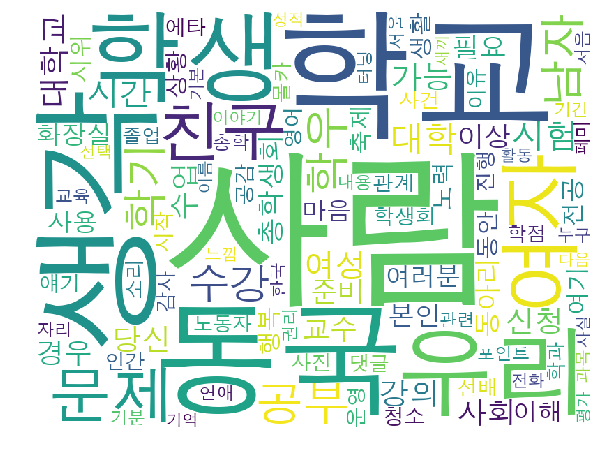

In [143]:
font_path = '/Library/Fonts/AppleGothic.ttf'
wc = WordCloud(font_path=font_path,background_color='white', width=800, height=600)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)

### 단어 임베딩

In [262]:
from konlpy.tag import Twitter; t = Twitter()
    
#tokenize
tokens_ = []
for line in l2:
    tmp = []
    line = t.pos(line)
    for i in line:
        if((i[1] != 'Eomi') and (i[1] != 'Josa') and (i[1] != 'KoreanParticle')and (i[1] != 'Punctuation')):
            tmp.append(i[0])
    tokens_.append(tmp)
    
len(tokens_)

#nouns tokenize
noun_tokens = []
for line in l2:
    tmp = []
    line = t.pos(line)
    for i in line:
        if(i[1] == 'Noun'):
            tmp.append(i[0])
    noun_tokens.append(tmp)

In [264]:
# Word2Vec embedding
from gensim.models import Word2Vec
embedding_model = Word2Vec(noun_tokens, size=100, min_count=10,window = 2,workers=4, iter=100, sg=1)

In [265]:
print(len(embedding_model.wv.vocab))

736


In [266]:
embedding_model.wv.most_similar("동국")[:3],embedding_model.wv.most_similar("동국대")[:3],embedding_model.wv.most_similar("동국대학교")[:3]

([('교지', 0.5702524185180664),
  ('미래', 0.4239790439605713),
  ('라인업', 0.4150807559490204)],
 [('최고', 0.47758910059928894),
  ('지방', 0.4021548628807068),
  ('동국대학교', 0.39622628688812256)],
 [('실', 0.43302303552627563),
  ('홈페이지', 0.412017822265625),
  ('동국대', 0.39622628688812256)])

In [267]:
embedding_model.wv.most_similar("여성"),embedding_model.wv.most_similar("여자")

([('운동', 0.4334513247013092),
  ('성', 0.42601922154426575),
  ('성희롱', 0.3942667543888092),
  ('세계', 0.3855368494987488),
  ('불법', 0.38153988122940063),
  ('약자', 0.3774924576282501),
  ('수사', 0.35272568464279175),
  ('기구', 0.3474791646003723),
  ('명의', 0.343220591545105),
  ('얼굴', 0.34314218163490295)],
 [('남자', 0.561299204826355),
  ('유포', 0.41437363624572754),
  ('그거', 0.3955489695072174),
  ('협박', 0.3947877287864685),
  ('동영상', 0.38602691888809204),
  ('출입', 0.37792474031448364),
  ('는걸', 0.3729037344455719),
  ('시발', 0.3618532419204712),
  ('새끼', 0.35185307264328003),
  ('짝사랑', 0.3480818569660187)])

In [268]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

In [269]:
vocab = list(embedding_model.wv.vocab)
X = embedding_model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

736
[ 0.26198506 -0.63369834 -0.9454146   0.13279189  0.47340623  0.47411126
  0.42496476 -0.43333092 -0.59244233 -0.51772141]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [270]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

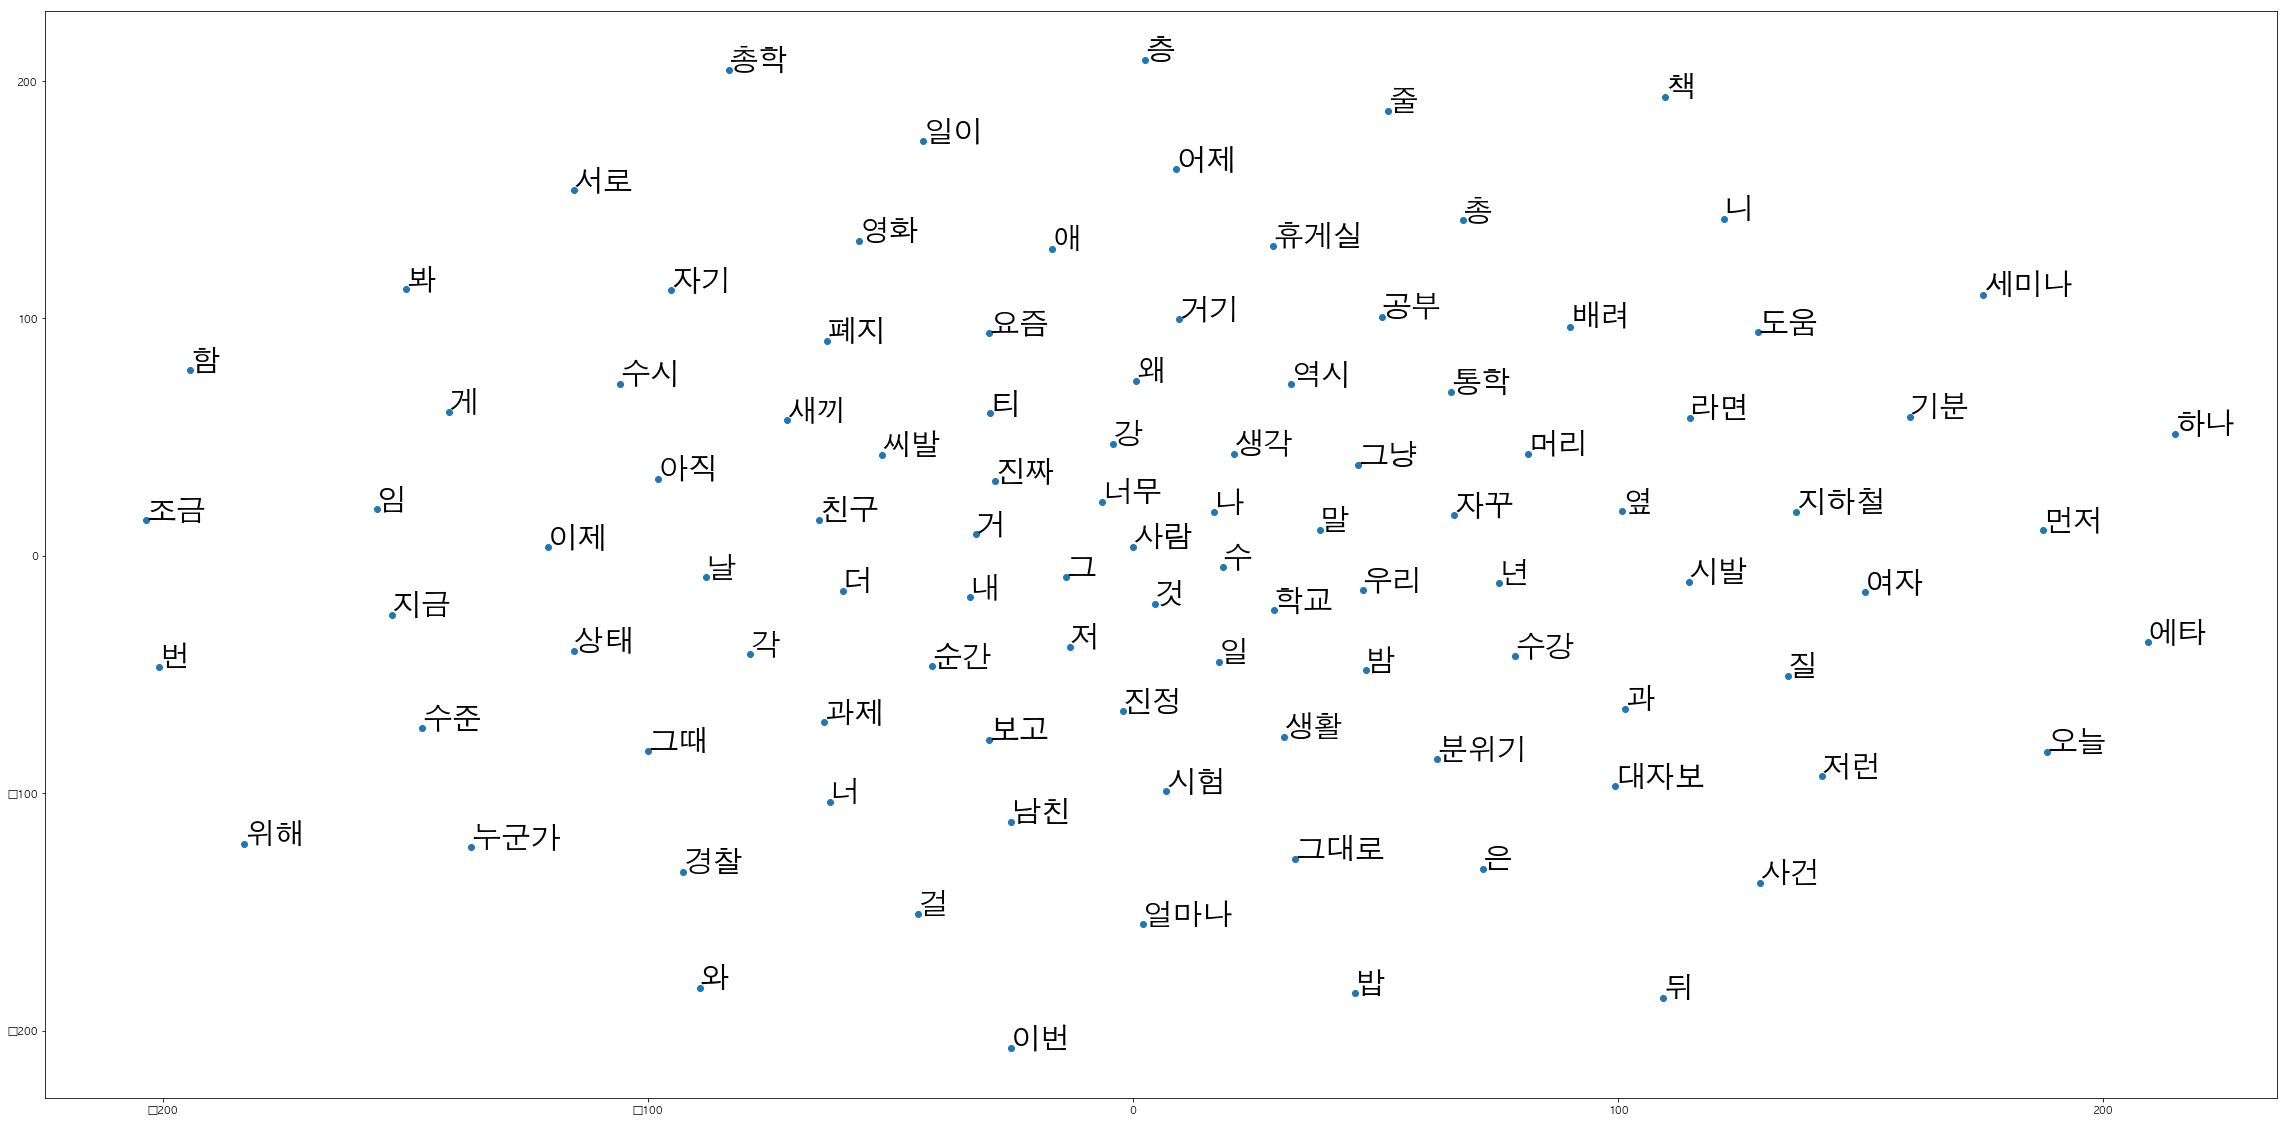

In [271]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()